This program calculates the average true range to measure volatility of BTC.
True range = max(|currentHigh - currentLow|, |currentHigh - previousClose|, |currentLow - closingPrice|)

resources = https://www.youtube.com/watch?v=ZpI-JDfuCs4

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
df = pd.read_csv('BTC-USD.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [19]:
high_low = df['High'] - df['Low']
high_prevClose = np.abs(df['High'] - df['Close'].shift(1))
low_prevClose = np.abs(df['Low'] - df['Close'].shift(1))
tempdf = pd.concat([high_low, high_prevClose, low_prevClose], axis=1)
tempdf.dropna(subset=[0, 1, 2], inplace=True)
true_range = tempdf.max(axis=1)

In [20]:
# Determine 14 day rolling average
average_true_range = true_range.rolling(14).mean()
df['Average True Range'] = average_true_range
df

,Date,Open,High,Low,Close,Volume,Average True Range
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,1.540991e+10,NaN
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,1.787202e+10,NaN
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,1.824903e+10,NaN
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,1.635049e+10,NaN
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,1.892708e+10,NaN
...,...,...,...,...,...,...,...
2021-12-04,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,6.138568e+10,3459.020926
2021-12-05,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,3.719820e+10,3496.532087
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,3.770731e+10,3500.958147
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,3.367681e+10,3466.402344


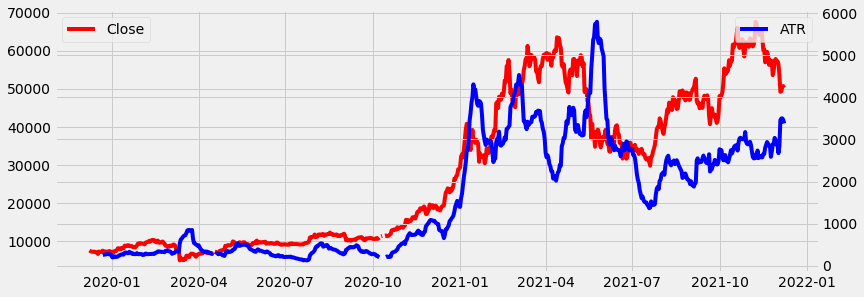

In [21]:
#Plot chart
fig, ax = plt.subplots(figsize=(12.2, 4.5))
ax.plot(df.index, df['Close'], label='Close', color='red')
ax2 = ax.twinx()
ax2.plot(df.index, df['Average True Range'], label='ATR', color='blue')
plt.legend(loc='best')
ax.legend(loc='best')
plt.show()

In [ ]:
Closing thoughts: ATR reflects volatility.